In [13]:
#imports
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import pro_acquire as acq
import pro_prepare as prep
import pro_model as pm
import knear as k

# Acquire

Explain methods
- Used .py embedded functions to call and prep Telco Churn dataset


In [14]:
# call data with prep function
df = prep.prep_telco()
df.T

csv file found and loaded


,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
payment_type_id,2,2,1,1,2,4,3,4,1,2,...,2,3,2,2,3,2,1,2,2,1
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,2,2,3,1,2,1,1,1
contract_type_id,2,1,1,1,1,1,3,3,1,3,...,1,2,2,1,1,2,1,1,3,3
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No


In [15]:
#drop uncessary columns
df = df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id','gender',
                           'senior_citizen','partner','dependents','phone_service','multiple_lines','online_security',
                           'online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing',
                           'churn', 'contract_type','internet_service_type','payment_type'])

In [16]:
#check it out
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,18.9,84.95,94.05,70.15,20.95,55.15,85.1,50.3,67.85,59.0
total_charges,593.3,542.4,280.85,1237.85,267.4,571.45,7904.25,5377.8,340.35,5957.9,...,18.9,4018.05,633.45,70.15,85.5,742.9,1873.7,92.75,4627.65,3707.6
gender_encoded,0,1,1,1,0,0,0,1,0,0,...,1,1,0,0,0,0,1,1,1,1
senior_citizen_encoded,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner_encoded,1,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,1
dependents_encoded,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
phone_service_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
paperless_billing_encoded,1,0,1,1,1,1,1,1,1,1,...,0,1,1,1,0,0,1,1,0,0


# Prepare
What you did to address nulls
- there were no null values in this version of the data
Column names you changed or not
- removed duplicate data contained in multiple columns
- encoded all yes or no values to numbers (0,1) for machine learning model

In [17]:
#move target (churn) to index level 1 of dataframe
column_to_move = df.pop("churn_encoded")
df.insert(1, "churn_encoded", column_to_move)
df

,customer_id,churn_encoded,tenure,monthly_charges,total_charges,gender_encoded,senior_citizen_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
0,0002-ORFBO,0,9,65.60,593.30,0,0,1,1,1,...,0,1,0,0,0,1,0,1,0,0
1,0003-MKNFE,0,9,59.90,542.40,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,1,4,73.90,280.85,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0011-IGKFF,1,13,98.00,1237.85,1,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
4,0013-EXCHZ,1,3,83.90,267.40,0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,13,55.15,742.90,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7039,9992-RRAMN,1,22,85.10,1873.70,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
7040,9992-UJOEL,0,2,50.30,92.75,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7041,9993-LHIEB,0,67,67.85,4627.65,1,0,1,1,1,...,0,0,0,1,0,1,0,0,0,1


In [18]:
# split data using function
train, validate, test = prep.split_data(df, 'churn_encoded')
train.T

,5911,2479,5889,6087,785,3057,5757,3465,1539,3175,...,4998,2899,6358,1795,5269,6102,356,1756,2127,3586
customer_id,8319-QBEHW,3547-LQRIK,8280-MQRQN,8626-PTQGE,1142-IHLOO,4374-YMUSQ,8098-LLAZX,4910-GMJOT,2250-IVBWA,4550-VBOFE,...,7025-IWFHT,4130-MZLCC,8999-EXMNO,2621-UDNLU,7426-WEIJX,8642-GVWRF,0523-VNGTF,2568-BRGYX,3057-VJJQE,5081-NWSUP
churn_encoded,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
tenure,26,47,1,69,51,34,4,1,64,70,...,41,5,19,3,60,2,52,4,35,10
monthly_charges,39.95,26.9,50.45,60.05,87.55,116.25,95.45,94.6,81.05,102.95,...,89.55,50.55,20.15,20.85,80.95,79.7,50.5,70.2,55.25,64.9
total_charges,1023.75,1250.85,50.45,4176.7,4475.9,3899.05,396.1,94.6,5135.35,7101.5,...,3729.75,244.75,387.7,72.0,4859.1,165.0,2566.3,237.95,1924.1,685.55
gender_encoded,1,0,0,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,1,1,0
senior_citizen_encoded,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
partner_encoded,0,1,0,0,0,0,0,0,1,1,...,0,0,1,1,1,1,0,0,0,0
dependents_encoded,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
phone_service_encoded,0,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


# Explore

In [19]:
#get columns to test
train[['churn_encoded','tenure','monthly_charges','senior_citizen_encoded', 'tech_support_Yes']]

,churn_encoded,tenure,monthly_charges,senior_citizen_encoded,tech_support_Yes
5911,0,26,39.95,0,0
2479,0,47,26.90,0,0
5889,1,1,50.45,0,0
6087,0,69,60.05,0,1
785,0,51,87.55,0,0
...,...,...,...,...,...
6102,1,2,79.70,0,0
356,0,52,50.50,1,1
1756,1,4,70.20,0,0
2127,0,35,55.25,0,0


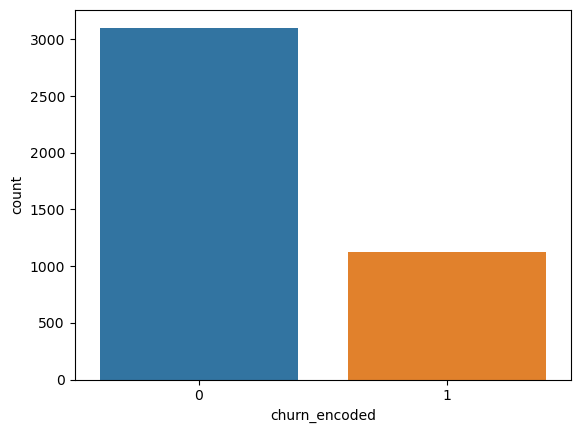

In [20]:
#Target = Churn
sns.countplot(data=train, x='churn_encoded')
plt.show()

# Do monthly charges affect churn rate?
- I want to explore whether or not tenure is statistically significant in relation to churn
- I am comparing a continuous variable to a categorical so I will run a 

$H_{0}$ : Mean of monthly charges of churned customers <= Mean of monthly charges of all customers

$H_{a}$ : Mean of monthly charges of churned customers > Mean of monthly charges of all customers

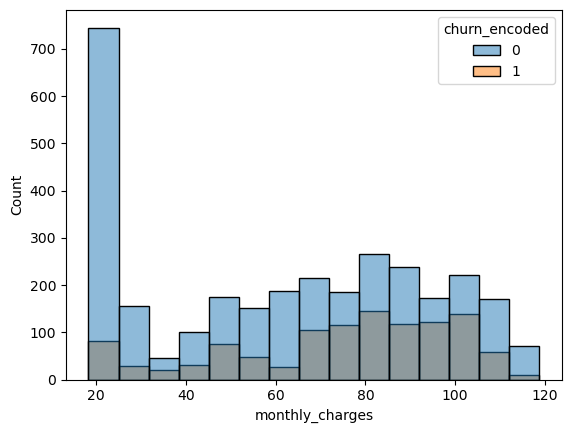

In [21]:
# Do monthly charges affect churn rate?
sns.histplot(data=train, x='monthly_charges', hue='churn_encoded')
plt.show()

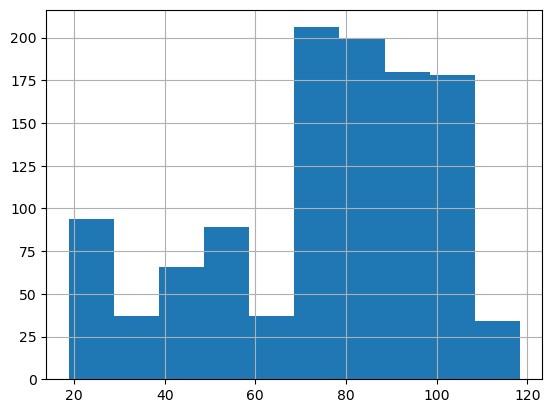

In [22]:
churn_sample = train[train.churn_encoded == 1].monthly_charges

churn_sample.hist()
plt.show()

In [23]:
alpha = .05

In [24]:
train.churn_encoded.value_counts()

0    3104
1    1121
Name: churn_encoded, dtype: int64

In [26]:
overall_mean

65.05614201183437

In [27]:
churn_sample = train[train.churn_encoded == 1].monthly_charges
overall_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

12.65294490503547 1.0740986591134452e-34 0.05


In [28]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


- based on the ttest results. There is a relationship between customers paying more and whether or not a customer churns. Therefore, based on the p-value < alpha, we reject the null hypothesis. I will use this feature in my model.

# Does tenure affect churn rate?
- I want to explore whether or not tenure is statistically significant in relation to churn
- I am comparing a continuous variable to a categorical so I will run a 

$H_{0}$ : There is no difference in the monthly charges of customers who have churned against those who have not churned

$H_{a}$ : There is a difference in the monthly charges of customers who have churned against those who have not churned

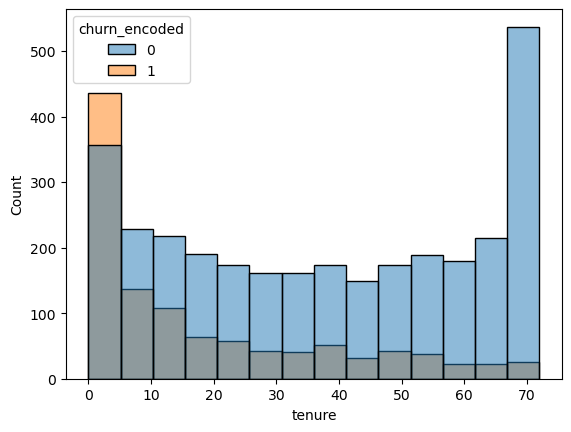

In [111]:
sns.histplot(data=train, x='tenure', hue='churn_encoded')
plt.show()

In [29]:
alpha = .05

In [30]:
train.tenure.mean()

32.500828402366864

In [113]:
train.churn_encoded.value_counts()

0    3104
1    1121
Name: churn_encoded, dtype: int64

In [126]:
churn_sample = train[train.churn_encoded == 1].tenure
not_churn_sample = train[train.churn_encoded == 0].tenure

t, p = stats.ttest_ind(churn_sample, not_churn_sample)

alpha = 0.05

t,p

(-24.1484254219915, 8.529422715711782e-121)

In [130]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


- based on the ttest results. There is a relationship between customer tenure and whether or not a customer churns. Therefore, based on the p-value < alpha, we reject the null hypothesis. I will use this feature in my model.

# Does whether or not someone has tech support affect churn?

$H_{0}$ : There is no difference in having tech support compared to customers who have churned against those who have not churned

$H_{a}$ : There is a difference in having tech support compared to customers who have churned against those who have not churned

- Since I have two categorical variables, I will run a $Chi^2$ test.

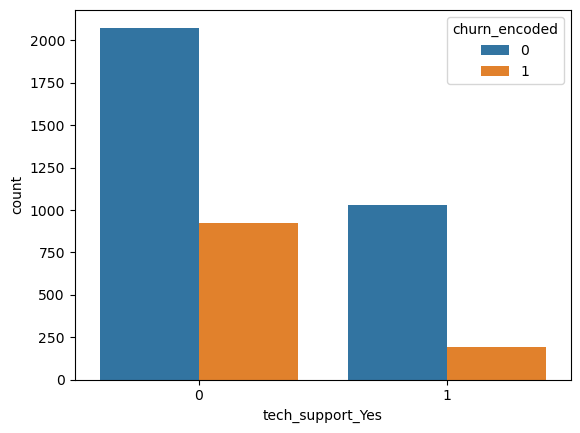

In [39]:
sns.countplot(data=train, x='tech_support_Yes', hue='churn_encoded')
plt.show()

In [37]:
(train.tech_support_Yes == 0).sum() 900

3002

In [33]:
(train.tech_support_Yes == 1).sum()

1223

In [38]:
900/3002

0.29980013324450366

In [41]:
190/1100

0.17272727272727273

In [64]:
alpha = 0.05
observed = pd.crosstab(train.churn_encoded, train.tech_support_Yes)
observed

tech_support_Yes,0,1
churn_encoded,,
0,2076,1028
1,926,195


In [62]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [63]:
print('observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p = {p:.4f}')

observed
[[2076 1028]
 [ 926  195]]

Expected
[[2205  898]
 [ 796  324]]

----
chi^2 = 98.2309
p = 0.0000


- based on the $chi^2$ results. There is a relationship between having tech support and whether or not a customer churns. Therefore, based on the p-value < alpha, we reject the null hypothesis. I will use this feature in my model.

# Does being a senior citizen or not affect churn?

$H_{0}$ : There is no difference in churn rate based on whether or not a customer is a senior citizen.

$H_{a}$ : There is a difference in churn rate based on whether or not a customer is a senior citizen.

- Since I have two categorical variables, I will run a $Chi^2$ test.

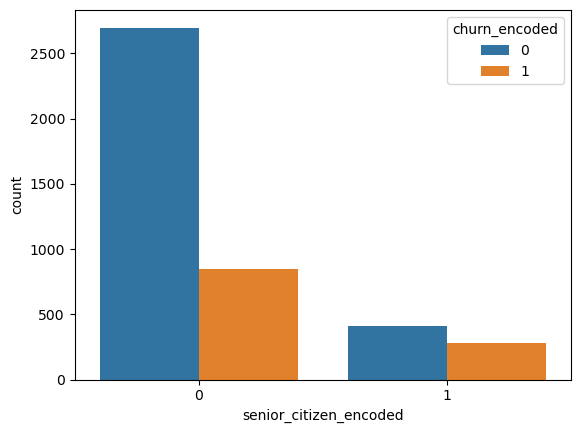

In [102]:
sns.countplot(data=train, x='senior_citizen_encoded', hue='churn_encoded')
plt.show()

In [42]:
train.senior_citizen_encoded.value_counts()

0    3541
1     684
Name: senior_citizen_encoded, dtype: int64

In [91]:
alpha = 0.05
observed1 = pd.crosstab(train.churn_encoded, train.senior_citizen_encoded)
observed1

senior_citizen_encoded,0,1
churn_encoded,,
0,2697,407
1,844,277


In [92]:
chi2, p, degf, expected = stats.chi2_contingency(observed1)

In [93]:
print('observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p = {p:.4f}')

observed
[[2076 1028]
 [ 926  195]]

Expected
[[2601  502]
 [ 939  181]]

----
chi^2 = 80.7936
p = 0.0000


- based on the $chi^2$ results. There is a relationship between being a senior citizen and whether or not a customer churns. Therefore, based on the p-value < alpha, we reject the null hypothesis. I will use this feature in my model.

*** If I had more time, I would like to move beyond this rudimentary analysis and analyze more in depth the relationships between variables.

# Modeling

- now that I have found significance in my 4 independent variables, I will model those against the target using the following models to determine the best predictive model:

    - Decision tree
    - Random forest
    - KNN
    - Logistic regression

In [207]:
#set X_train, X_validate, X_test : to selected features
xt = train[['customer_id','tenure','monthly_charges','senior_citizen_encoded', 'tech_support_Yes']]
xv = validate[['customer_id','tenure','monthly_charges','senior_citizen_encoded', 'tech_support_Yes']]
xtest = test[['customer_id','tenure','monthly_charges','senior_citizen_encoded', 'tech_support_Yes']]
xt

,customer_id,tenure,monthly_charges,senior_citizen_encoded,tech_support_Yes
5911,8319-QBEHW,26,39.95,0,0
2479,3547-LQRIK,47,26.90,0,0
5889,8280-MQRQN,1,50.45,0,0
6087,8626-PTQGE,69,60.05,0,1
785,1142-IHLOO,51,87.55,0,0
...,...,...,...,...,...
6102,8642-GVWRF,2,79.70,0,0
356,0523-VNGTF,52,50.50,1,1
1756,2568-BRGYX,4,70.20,0,0
2127,3057-VJJQE,35,55.25,0,0


In [210]:
X_train = xt.iloc[:,1:]
X_validate = xv.iloc[:,1:]
X_test = xtest.iloc[:,1:]
X_train

,tenure,monthly_charges,senior_citizen_encoded,tech_support_Yes
5911,26,39.95,0,0
2479,47,26.90,0,0
5889,1,50.45,0,0
6087,69,60.05,0,1
785,51,87.55,0,0
...,...,...,...,...
6102,2,79.70,0,0
356,52,50.50,1,1
1756,4,70.20,0,0
2127,35,55.25,0,0


In [211]:
#set target
target = 'churn_encoded'

In [212]:
#set y_train, y_validate, y_test
y_train = train[target]
y_validate = validate[target]
y_test = test[target]
y_train.head()

5911    0
2479    0
5889    1
6087    0
785     0
Name: churn_encoded, dtype: int64

In [213]:
#check for positive or negative outcome based on frequency -- didn't churn is our positive outcome
train.churn_encoded.value_counts()

0    3104
1    1121
Name: churn_encoded, dtype: int64

In [214]:
#set baseline accuracy
(train.churn_encoded == 0).mean()

0.7346745562130178

### Decision tree

In [215]:
scores_all = []
for x in range(1,20):
#    print(x)
    tree = DecisionTreeClassifier(max_depth = x)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train,y_train)
    val_acc = tree.score(X_validate, y_validate)
    score_diff = (train_acc - val_acc)
    scores_all.append([x, train_acc, val_acc,score_diff])
    
scores_all
scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc','val_acc','score_diff'])
scores_df

,max_depth,train_acc,val_acc,score_diff
0,1,0.734675,0.734564,0.000111
1,2,0.781775,0.785664,-0.003888
2,3,0.781775,0.785664,-0.003888
3,4,0.789349,0.789212,0.000137
4,5,0.800473,0.793471,0.007003
5,6,0.804260,0.790632,0.013629
6,7,0.817278,0.782825,0.034453
7,8,0.829586,0.767921,0.061665
8,9,0.842840,0.764372,0.078468
9,10,0.860118,0.753016,0.107102


In [216]:
#create
dtree = DecisionTreeClassifier(max_depth=4)

#fit 
#with features
dtree.fit(X_train, y_train)

#transform 
#with features
dtree.score(X_train, y_train)

0.7893491124260354

In [217]:
dtree.score(X_validate, y_validate)

0.7892122072391767

- based on these decision trees I would choose a tree with max depth 4. Which has the lowest difference between validate and train, while simultaneously beating the baseline.

### Random Forest

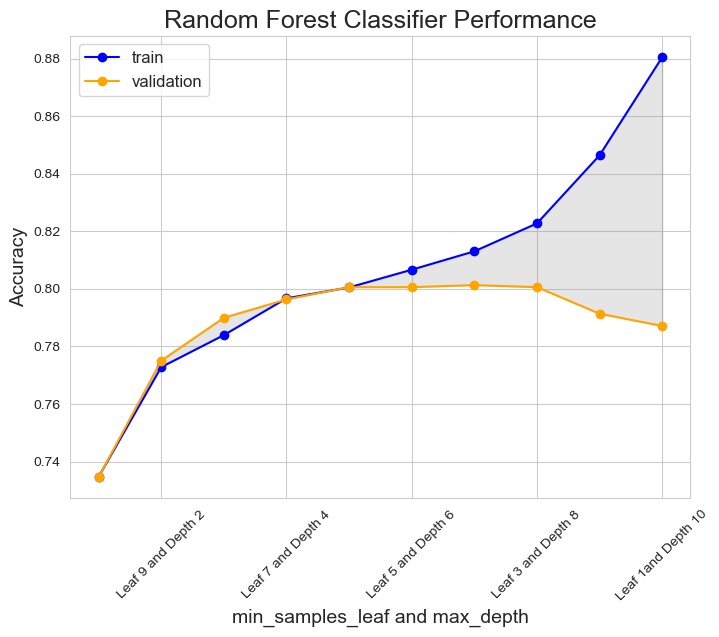

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
0,1,10,0.880473,0.787083,0.093390
1,2,9,0.846391,0.791341,0.055049
2,3,8,0.822722,0.800568,0.022154
3,4,7,0.813018,0.801278,0.011740
4,5,6,0.806627,0.800568,0.006059
5,6,5,0.800473,0.800568,-0.000094
6,7,4,0.796686,0.796309,0.000377
7,8,3,0.783905,0.789922,-0.006017
8,9,2,0.772781,0.775018,-0.002237
9,10,1,0.734675,0.734564,0.000111


In [218]:
pm.random_forest_scores(X_train, y_train, X_validate, y_validate)

In [219]:
trees_rf = RandomForestClassifier(random_state=123, min_samples_leaf= 5, max_depth=6)
trees_rf

RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=123)

In [220]:
trees_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=123)

In [221]:
trees_rf.score(X_train, y_train)

0.8066272189349113

In [222]:
trees_rf.score(X_validate, y_validate)

0.8005677785663591

In [223]:
#see predictions
trees_rf.predict(X_train)

array([0, 0, 1, ..., 1, 0, 0])

In [224]:
#see probability of predictions 
trees_rf.predict_proba(X_train)[:5]

array([[0.89549765, 0.10450235],
       [0.95847023, 0.04152977],
       [0.38825289, 0.61174711],
       [0.97294743, 0.02705257],
       [0.75558583, 0.24441417]])

### KNN

In [225]:
import warnings
warnings.filterwarnings('ignore')

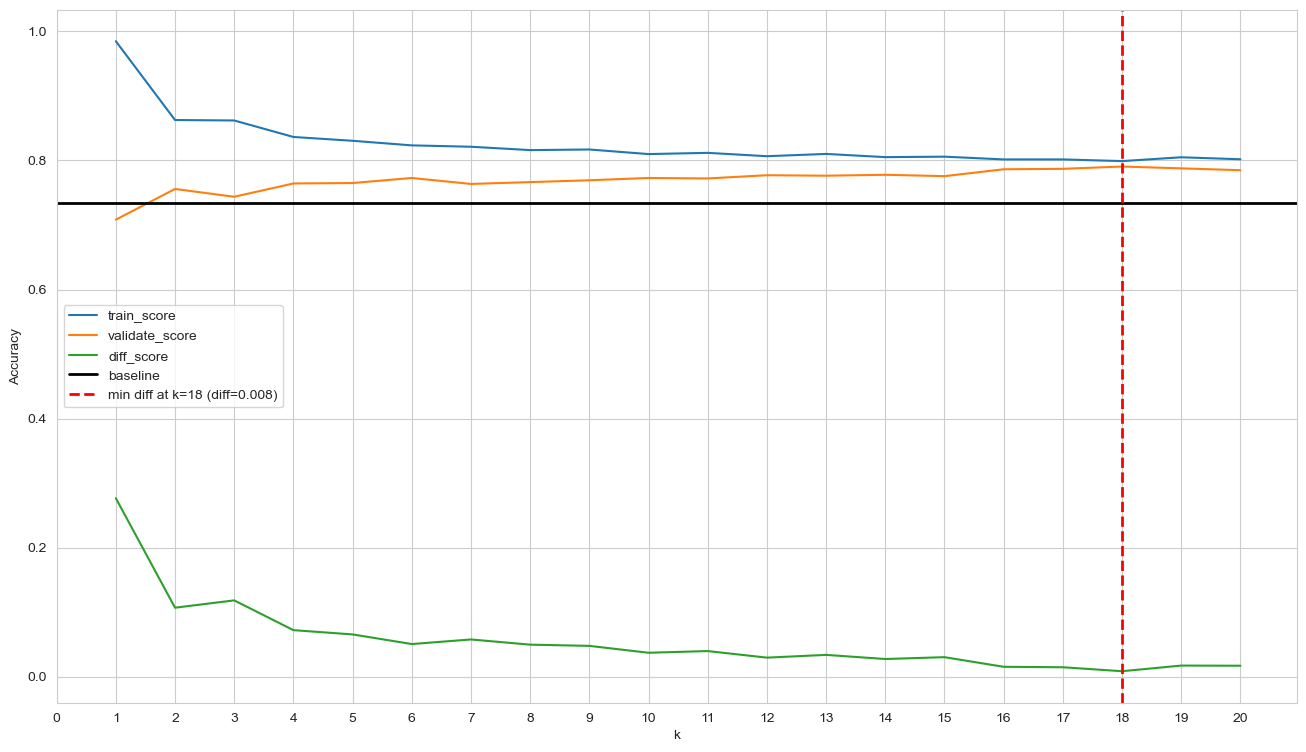

,k,train_score,validate_score,diff_score
0,1,0.984852,0.708304,0.276548
1,2,0.862722,0.755855,0.106867
2,3,0.862012,0.743790,0.118222
3,4,0.836450,0.764372,0.072078
4,5,0.830533,0.765082,0.065451
5,6,0.823432,0.772889,0.050543
6,7,0.821302,0.763662,0.057640
7,8,0.816095,0.766501,0.049594
8,9,0.817041,0.769340,0.047701
9,10,0.809941,0.772889,0.037052


In [226]:
k.k_nearest2(X_train, y_train, X_validate, y_validate)

In [227]:
#make the thing
knn = KNeighborsClassifier(n_neighbors=18, weights='uniform')
#fit it
knn.fit(X_train, y_train)
#predict
y_pred = knn.predict(X_train)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [228]:
knn.score(X_train, y_train)

0.7990532544378698

In [229]:
knn.score(X_validate, y_validate)

0.7906316536550745

# Logistic Regression

In [230]:
#make the model
logit = LogisticRegression()
logit

LogisticRegression()

In [231]:
#fit the model
logit.fit(X_train, y_train)

LogisticRegression()

In [232]:
#score it
logit.score(X_train, y_train)

0.7820118343195266

In [233]:
#score it
logit.score(X_validate, y_validate)

0.794180269694819

# Choose a model
- based on the following :
    - Baseline accuracy: 0.7346745562130178
    - Decision Tree
        - train: 0.7893491124260354
        - validate: 0.7892122072391767
        - difference: 0.00013690518685871567
    - Random Forest
        - train: 0.8066272189349113
        - validate: 0.8005677785663591
        - difference: 0.006059440368552216
    - KNN
        - train: 0.7990532544378698
        - validate: 0.7906316536550745
        - difference: 0.008421600782795302
    - Logistic Regression
        - train: 0.7820118343195266
        - validate: 0.794180269694819
        - difference: -0.012168435375292441
        
All models performed better than baseline. Out of the 4 models, the random forest model performed the best in both the train and validate iterations. Therefore, I chose random forest as my model of choice for this project.

# Run selected model on test data and get predictions

In [234]:
trees_rf.score(X_test, y_test)

0.7920511000709723

In [235]:
trees_rf.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [236]:
trees_rf.predict_proba(X_test)

array([[0.78666096, 0.21333904],
       [0.86801957, 0.13198043],
       [0.51940922, 0.48059078],
       ...,
       [0.97750995, 0.02249005],
       [0.9341009 , 0.0658991 ],
       [0.51933502, 0.48066498]])

# Make CSV of data predictions

In [239]:
import pandas as pd

# Assuming X_test contains the features used for prediction
prediction = trees_rf.predict(X_test)
prediction_prob = trees_rf.predict_proba(X_test)

# Combine customer_id, prediction, and prediction_prob into a pandas DataFrame
result_df = pd.DataFrame({
    'customer_id': xtest.customer_id,
    'prediction': prediction,
    'prediction_prob_1': prediction_prob[:, 1],  # probability of class 1
})

# Export the DataFrame as a CSV file
result_df.to_csv('result.csv', index=False)


# Summary/Conclusion/Recommendations

- the following data analysis pipeline categories were accomplished (Acquire, Prepare, Explore, Model)
- I selected the best model based on the determined features. The decision was made based on highest accuracy score with least difference between train and validate data sets.
- with more time, further statistical analysis of the remaining features would be in the best interest of the company. Analyzing the relationships between multiple features in relation to churn, for example.. senior citizen, no tech support and has fiber internet. Even though the selected features affect churn, their relationships to other factors may direct where we want to focus efforts. 

